In [1]:
import sys
sys.path.append("../../src")
import torch
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torch.nn.functional as F
import argparse
import matplotlib

from tqdm import tqdm
import glob
from PIL import Image
import os
from datetime import datetime
import time
import math
from torch.autograd import Variable
from biotorch.module.biomodule import BioModule

from ANN import *
from visualization import *

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [3]:
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(), 
                                            torchvision.transforms.Normalize(mean=(0.0,), std=(1.0,))])

mnist_dset_train = torchvision.datasets.MNIST('../../data', train=True, transform=transform, target_transform=None, download=True)
train_loader = torch.utils.data.DataLoader(mnist_dset_train, batch_size=20, shuffle=True, num_workers=0)

mnist_dset_test = torchvision.datasets.MNIST('../../data', train=False, transform=transform, target_transform=None, download=True)
test_loader = torch.utils.data.DataLoader(mnist_dset_test, batch_size=20, shuffle=False, num_workers=0)

In [4]:
device = "cuda"
# criterion = torch.nn.MSELoss().to(device)
criterion = torch.nn.CrossEntropyLoss()
activation = F.relu
architecture = [784, 500, 500, 10]
model = BioModule(MLP(architecture, activation = activation, final_layer_activation = None), mode = "fa").to(device)
model

Module has been converted to fa mode:

The layer configuration was:  {'type': 'fa', 'options': {'constrain_weights': False, 'gradient_clip': False, 'init': 'xavier'}}
- All the 3 <class 'torch.nn.modules.linear.Linear'> layers were converted successfully.


BioModule(
  (module): MLP(
    (linear_layers): ModuleList(
      (0): Linear(in_features=784, out_features=500, bias=True)
      (1): Linear(in_features=500, out_features=500, bias=True)
      (2): Linear(in_features=500, out_features=10, bias=True)
    )
  )
)

In [5]:
model

BioModule(
  (module): MLP(
    (linear_layers): ModuleList(
      (0): Linear(in_features=784, out_features=500, bias=True)
      (1): Linear(in_features=500, out_features=500, bias=True)
      (2): Linear(in_features=500, out_features=10, bias=True)
    )
  )
)

In [6]:
evaluateClassification(model, train_loader, "cuda")

Accuracy :	 0.09818333333333333


0.09818333333333333

In [7]:
# # specify optimizer (stochastic gradient descent) and learning rate
optimizer = torch.optim.Adam(model.parameters(),lr = 0.0005)
# optimizer = torch.optim.SGD(model.parameters(), lr=1e-3, momentum=0.9, weight_decay=0.001)

lr_decay_step = 50
lr_decay = 0.9
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=lr_decay_step, gamma=lr_decay)
trn_acc_list = []
tst_acc_list = []

n_epochs = 20
for epoch_ in range(n_epochs):
    model.train()
    for idx, (x, y) in tqdm(enumerate(train_loader)):
        x, y = Variable(x.to(device)), Variable(y.to(device))
        y_one_hot = F.one_hot(y, num_classes=10)
        optimizer.zero_grad()
        y_hat = model(x)
        loss = criterion(y_hat,y) # Use this if criterion = torch.nn.CrossEntropyLoss()
#         loss = criterion(y_hat,y_one_hot.to(torch.float32)) # Use this if criterion = torch.nn.MSELoss().to(device)
        # backward pass: compute gradient of the loss with respect to model parameters
#         model.zero_grad()
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
    
    scheduler.step()
    trn_acc = evaluateClassification(model, train_loader, device, False)
    tst_acc = evaluateClassification(model, test_loader, device, False)
    trn_acc_list.append(trn_acc)
    tst_acc_list.append(tst_acc)
    
    print("Epoch : {}, Train Accuracy : {}, Test Accuracy : {}".format(epoch_+1, trn_acc, tst_acc))

3000it [00:11, 256.23it/s]
26it [00:00, 255.39it/s]

Epoch : 1, Train Accuracy : 0.9506333333333333, Test Accuracy : 0.9466


3000it [00:11, 259.53it/s]
26it [00:00, 256.04it/s]

Epoch : 2, Train Accuracy : 0.9659833333333333, Test Accuracy : 0.9616


3000it [00:11, 257.18it/s]
26it [00:00, 257.51it/s]

Epoch : 3, Train Accuracy : 0.9717666666666667, Test Accuracy : 0.9635


3000it [00:11, 259.50it/s]
26it [00:00, 257.42it/s]

Epoch : 4, Train Accuracy : 0.9723, Test Accuracy : 0.9655


3000it [00:11, 259.49it/s]
26it [00:00, 257.19it/s]

Epoch : 5, Train Accuracy : 0.985, Test Accuracy : 0.9749


3000it [00:11, 259.48it/s]
26it [00:00, 257.51it/s]

Epoch : 6, Train Accuracy : 0.9743166666666667, Test Accuracy : 0.9625


3000it [00:11, 258.97it/s]
26it [00:00, 256.60it/s]

Epoch : 7, Train Accuracy : 0.98265, Test Accuracy : 0.9717


3000it [00:11, 259.39it/s]
26it [00:00, 256.80it/s]

Epoch : 8, Train Accuracy : 0.9869166666666667, Test Accuracy : 0.972


3000it [00:11, 258.56it/s]
26it [00:00, 254.73it/s]

Epoch : 9, Train Accuracy : 0.9855666666666667, Test Accuracy : 0.9702


3000it [00:11, 257.42it/s]
26it [00:00, 256.48it/s]

Epoch : 10, Train Accuracy : 0.9862, Test Accuracy : 0.9751


3000it [00:11, 258.03it/s]
26it [00:00, 256.91it/s]

Epoch : 11, Train Accuracy : 0.9878166666666667, Test Accuracy : 0.974


3000it [00:11, 258.83it/s]
26it [00:00, 258.37it/s]

Epoch : 12, Train Accuracy : 0.9843333333333333, Test Accuracy : 0.9711


3000it [00:11, 258.55it/s]
26it [00:00, 257.78it/s]

Epoch : 13, Train Accuracy : 0.9862666666666666, Test Accuracy : 0.9741


3000it [00:11, 255.87it/s]
26it [00:00, 254.54it/s]

Epoch : 14, Train Accuracy : 0.9892333333333333, Test Accuracy : 0.9737


3000it [00:11, 258.43it/s]
26it [00:00, 256.80it/s]

Epoch : 15, Train Accuracy : 0.9833833333333334, Test Accuracy : 0.9694


3000it [00:11, 258.90it/s]
26it [00:00, 252.63it/s]

Epoch : 16, Train Accuracy : 0.9909333333333333, Test Accuracy : 0.9753


3000it [00:11, 258.22it/s]
26it [00:00, 256.96it/s]

Epoch : 17, Train Accuracy : 0.9901666666666666, Test Accuracy : 0.9741


3000it [00:11, 257.78it/s]
26it [00:00, 253.72it/s]

Epoch : 18, Train Accuracy : 0.9876333333333334, Test Accuracy : 0.9722


3000it [00:11, 257.50it/s]
26it [00:00, 259.45it/s]

Epoch : 19, Train Accuracy : 0.9957833333333334, Test Accuracy : 0.9815


3000it [00:11, 258.07it/s]


Epoch : 20, Train Accuracy : 0.9956, Test Accuracy : 0.9812


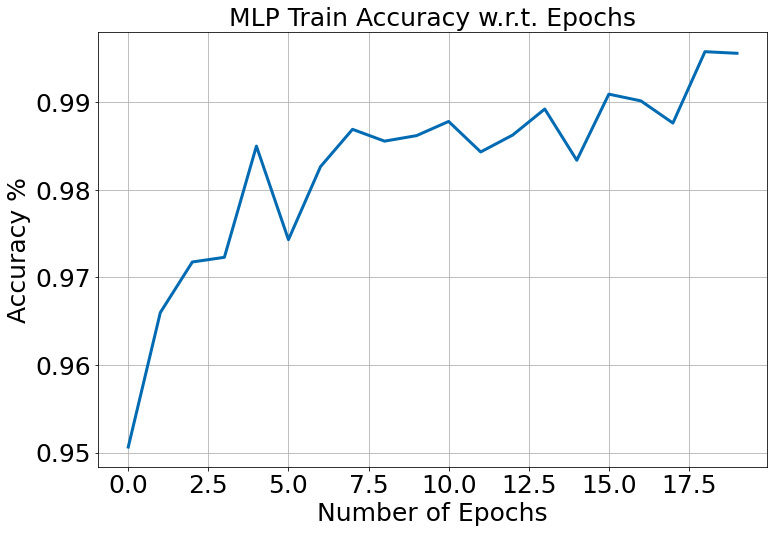

In [8]:
plot_convergence_plot(trn_acc_list, xlabel = 'Number of Epochs', ylabel = 'Accuracy %',
                      title = 'MLP Train Accuracy w.r.t. Epochs', 
                      figsize = (12,8), fontsize = 25, linewidth = 3)

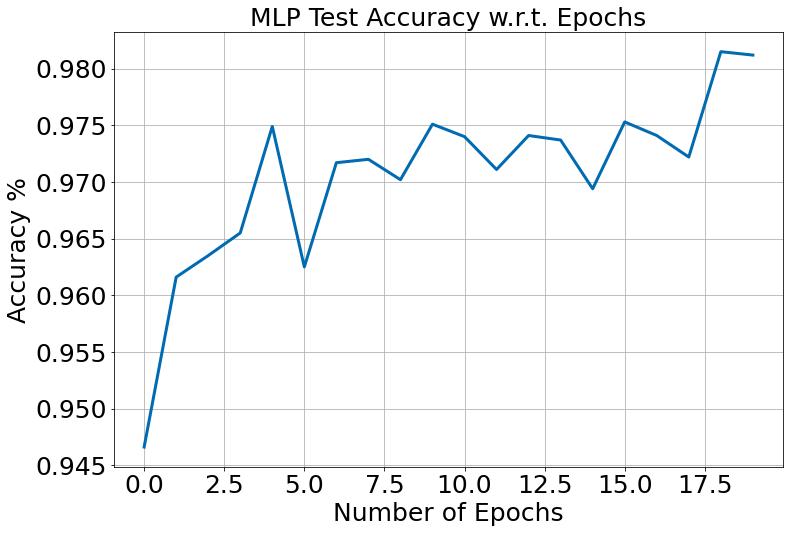

In [9]:
plot_convergence_plot(tst_acc_list, xlabel = 'Number of Epochs', ylabel = 'Accuracy %',
                      title = 'MLP Test Accuracy w.r.t. Epochs', 
                      figsize = (12,8), fontsize = 25, linewidth = 3)